In [2]:
pip install pandas matplotlib seaborn

  Using cached matplotlib-3.10.6-cp313-cp313-macosx_10_13_x86_64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.3-cp313-cp313-macosx_10_13_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.0-cp313-cp313-macosx_10_13_x86_64.whl.metadata (111 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-macosx_10_13_x86_64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp313-cp313-macosx_10_13_x86_64.whl.metadata (9.0 kB)
Using cached matplotlib-3.10.6-cp313-cp313-macosx_10_13_x86_64.whl (8.3 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.3-cp313-cp313-macosx_10_13_x86_64.whl (293 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.0-cp313-cp313-macosx_10_13_x86_64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp313-cp313-macosx_10_13_x86_64.whl (66 kB)
Using cached pillow-11.3.0-cp313-cp313-

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('UTDSpotify_History.csv', parse_dates=['Date/Time'])
display(df.head())
display(df.tail())
print(df.columns)

,Date/Time,Song Name,Artist,Song ID
0,2014-12-19 10:31:24+00:00,Bad (feat. Vassy) - Radio Edit,David Guetta,66b8a84c502856afb78afec2696f4de0
1,2014-12-19 10:31:26+00:00,Somebody To You,The Vamps,ecca7ca709d298d8610ec7987860b092
2,2014-12-19 10:31:31+00:00,Change Your Ticket,One Direction,4f316291aecef773c1b877cf6c148844
3,2014-12-22 19:45:10+00:00,Shower,Becky G,1997c967215fbd12595ff658ade0ef4d
4,2014-12-23 15:54:33+00:00,Shower,Becky G,1997c967215fbd12595ff658ade0ef4d


,Date/Time,Song Name,Artist,Song ID
179339,2025-09-25 12:53:00+00:00,Doin' Time,Lana Del Rey,0Oqc0kKFsQ6MhFOLBNZIGX
179340,2025-09-25 13:03:00+00:00,Death By A Thousand Cuts,Taylor Swift,2dgFqt3w9xIQRjhPtwNk3D
179341,2025-09-25 13:07:00+00:00,Forever & Always (Taylor’s Version),Taylor Swift,1msEuwSBneBKpVCZQcFTsU
179342,2025-09-25 13:11:00+00:00,Alter Ego (with JT),Doechii,2xaaJcmvMOmpDbTwlWnjFh
179343,2025-09-25 13:14:00+00:00,Va Va Voom,Nicki Minaj,2jATUzETZL49e6SywauZKE


Index(['Date/Time', 'Song Name', 'Artist', 'Song ID'], dtype='object')


In [4]:
df["Date/Time"] = pd.to_datetime(df["Date/Time"], errors="coerce")
df["Date"] = df["Date/Time"].dt.date
df["Hour"] = df["Date/Time"].dt.hour
df["Weekday"] = df["Date/Time"].dt.day_name()
df["Month"] = df["Date/Time"].dt.month_name()

In [6]:

daily_counts = df.groupby('Date').size()
print(f"Daily counts shape: {daily_counts.shape}")
print(f"Date range: {daily_counts.index.min()} to {daily_counts.index.max()}")
display(daily_counts.head())

Daily counts shape: (3291,)
Date range: 2014-12-19 to 2025-09-25


Date
2014-12-19     3
2014-12-22     1
2014-12-23    27
2014-12-24    38
2014-12-26    16
dtype: int64

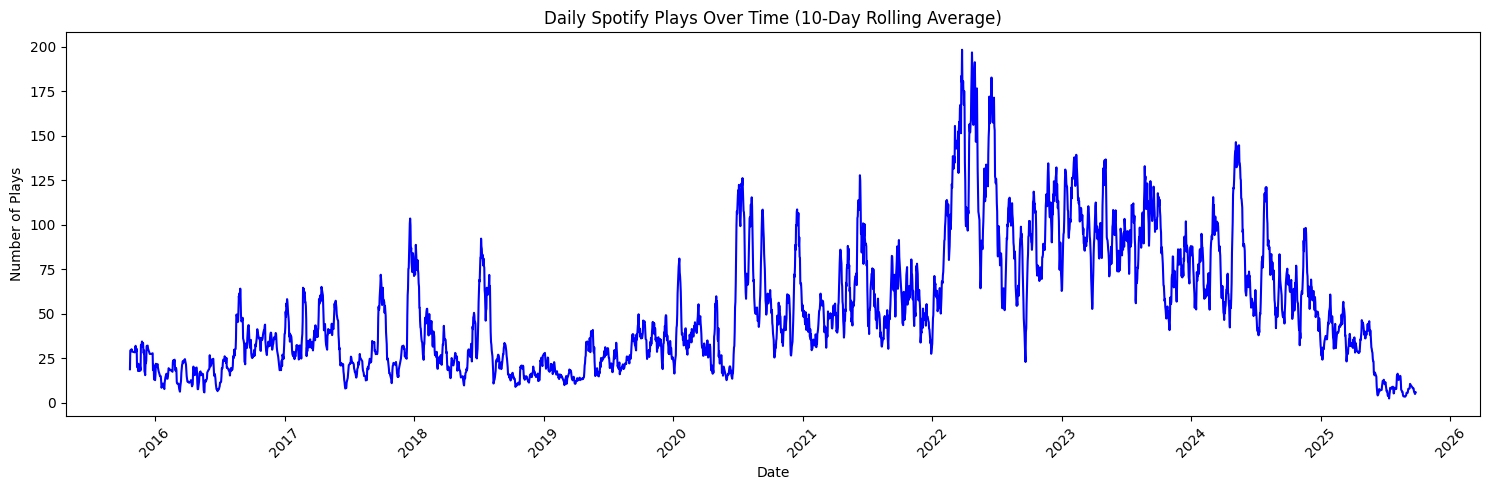

In [7]:
import matplotlib.pyplot as plt

daily_counts_rolling = daily_counts.rolling(window=10).mean()
plt.figure(figsize=(15,5))
daily_counts_rolling.plot(color='blue')
plt.title("Daily Spotify Plays Over Time (10-Day Rolling Average)")
plt.xlabel("Date")
plt.ylabel("Number of Plays")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/b7/q4qn51851rbf8n4823bbcm7r0000gn/T/ipykernel_9485/1303349473.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_song_names, x=top_songs.values, palette="magma")


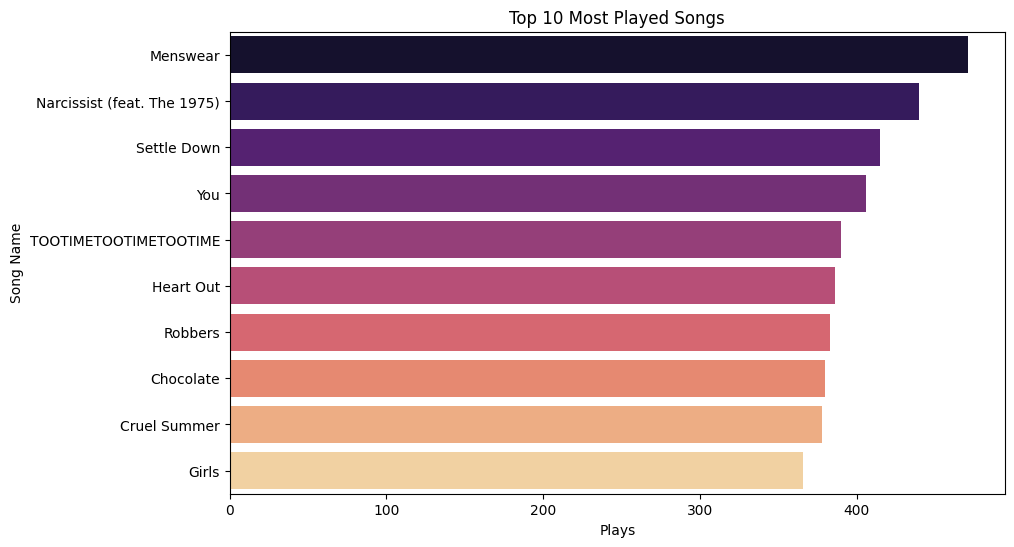

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

top_songs = df.groupby("Song ID").size().sort_values(ascending=False).head(10)
song_names = df.set_index("Song ID")["Song Name"].to_dict()
top_song_names = [song_names[song_id] for song_id in top_songs.index]

plt.figure(figsize=(10,6))
sns.barplot(y=top_song_names, x=top_songs.values, palette="magma")
plt.title("Top 10 Most Played Songs")
plt.xlabel("Plays")
plt.ylabel("Song Name")
plt.show()

/var/folders/b7/q4qn51851rbf8n4823bbcm7r0000gn/T/ipykernel_9485/3868059913.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_artists.index, x=top_artists.values, palette="magma")


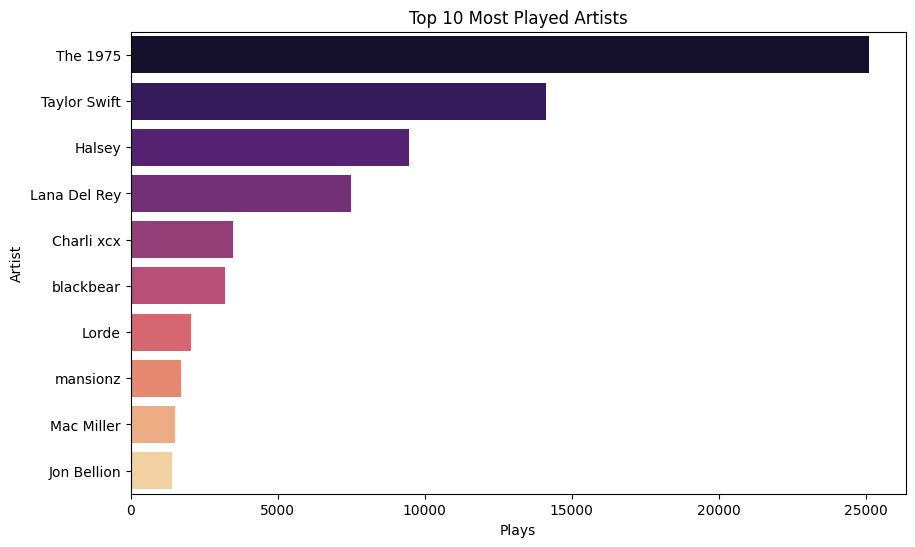

In [9]:
top_artists = df["Artist"].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=top_artists.index, x=top_artists.values, palette="magma")
plt.title("Top 10 Most Played Artists")
plt.xlabel("Plays")
plt.ylabel("Artist")
plt.show()

/var/folders/b7/q4qn51851rbf8n4823bbcm7r0000gn/T/ipykernel_9485/4241473419.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette="Set2")


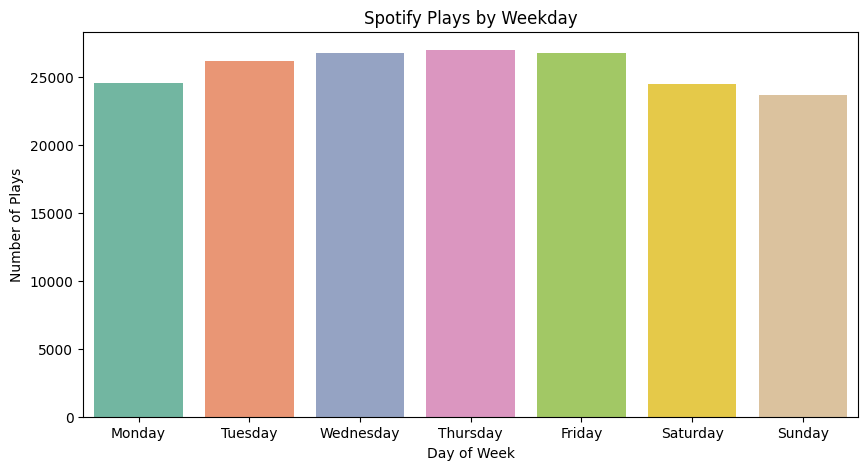

In [10]:
weekday_counts = df["Weekday"].value_counts().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)
plt.figure(figsize=(10,5))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette="Set2")
plt.title("Spotify Plays by Weekday")
plt.xlabel("Day of Week")
plt.ylabel("Number of Plays")
plt.show()

/var/folders/b7/q4qn51851rbf8n4823bbcm7r0000gn/T/ipykernel_9485/1315565513.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette="Spectral")


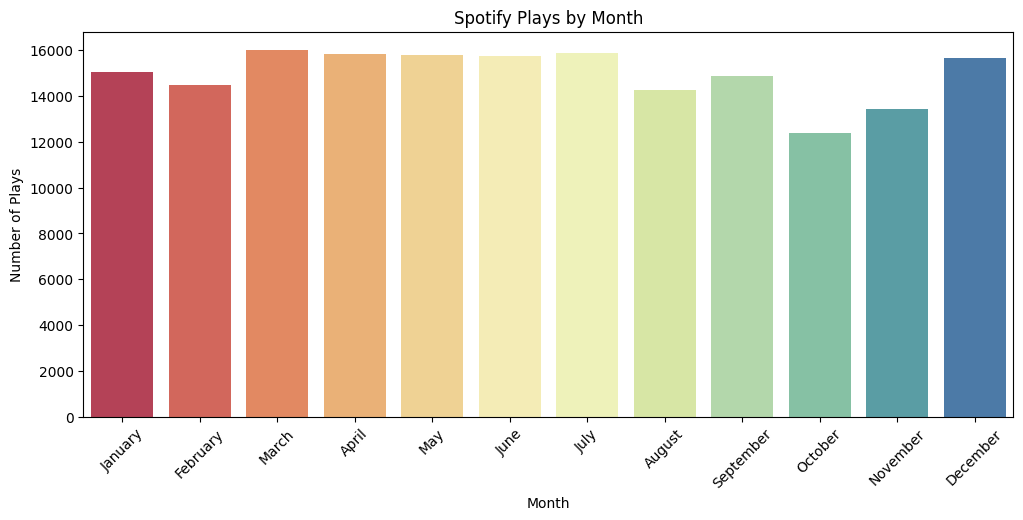

In [11]:
month_order = ["January","February","March","April","May","June","July","August",
               "September","October","November","December"]
monthly_counts = df["Month"].value_counts().reindex(month_order)
plt.figure(figsize=(12,5))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette="Spectral")
plt.title("Spotify Plays by Month")
plt.xlabel("Month")
plt.ylabel("Number of Plays")
plt.xticks(rotation=45)
plt.show()

In [25]:

days_to_analyze = 365  # This can be changed

latest_date = df['Date'].max()
print(f"Latest date in dataset: {latest_date}")

cutoff_date = latest_date - pd.Timedelta(days=days_to_analyze)
print(f"Analyzing data from {cutoff_date} to {latest_date} ({days_to_analyze} days)")

df_recent = df[df['Date'] >= cutoff_date].copy()
print(f"Total records in full dataset: {len(df)}")
print(f"Records in last {days_to_analyze} days: {len(df_recent)}")

if len(df_recent) > 0:
    print(f"\nRecent data summary:")
    print(f"Date range: {df_recent['Date'].min()} to {df_recent['Date'].max()}")
    print(f"Average plays per day: {len(df_recent) / days_to_analyze:.1f}")
    print(f"Most active day: {df_recent['Date'].value_counts().index[0]} with {df_recent['Date'].value_counts().iloc[0]} plays")
else:
    print(f"No data found for the last {days_to_analyze} days")

Latest date in dataset: 2025-09-25
Analyzing data from 2024-09-25 to 2025-09-25 (365 days)
Total records in full dataset: 179344
Records in last 365 days: 11720

Recent data summary:
Date range: 2024-09-26 to 2025-09-25
Average plays per day: 32.1
Most active day: 2024-11-13 with 166 plays


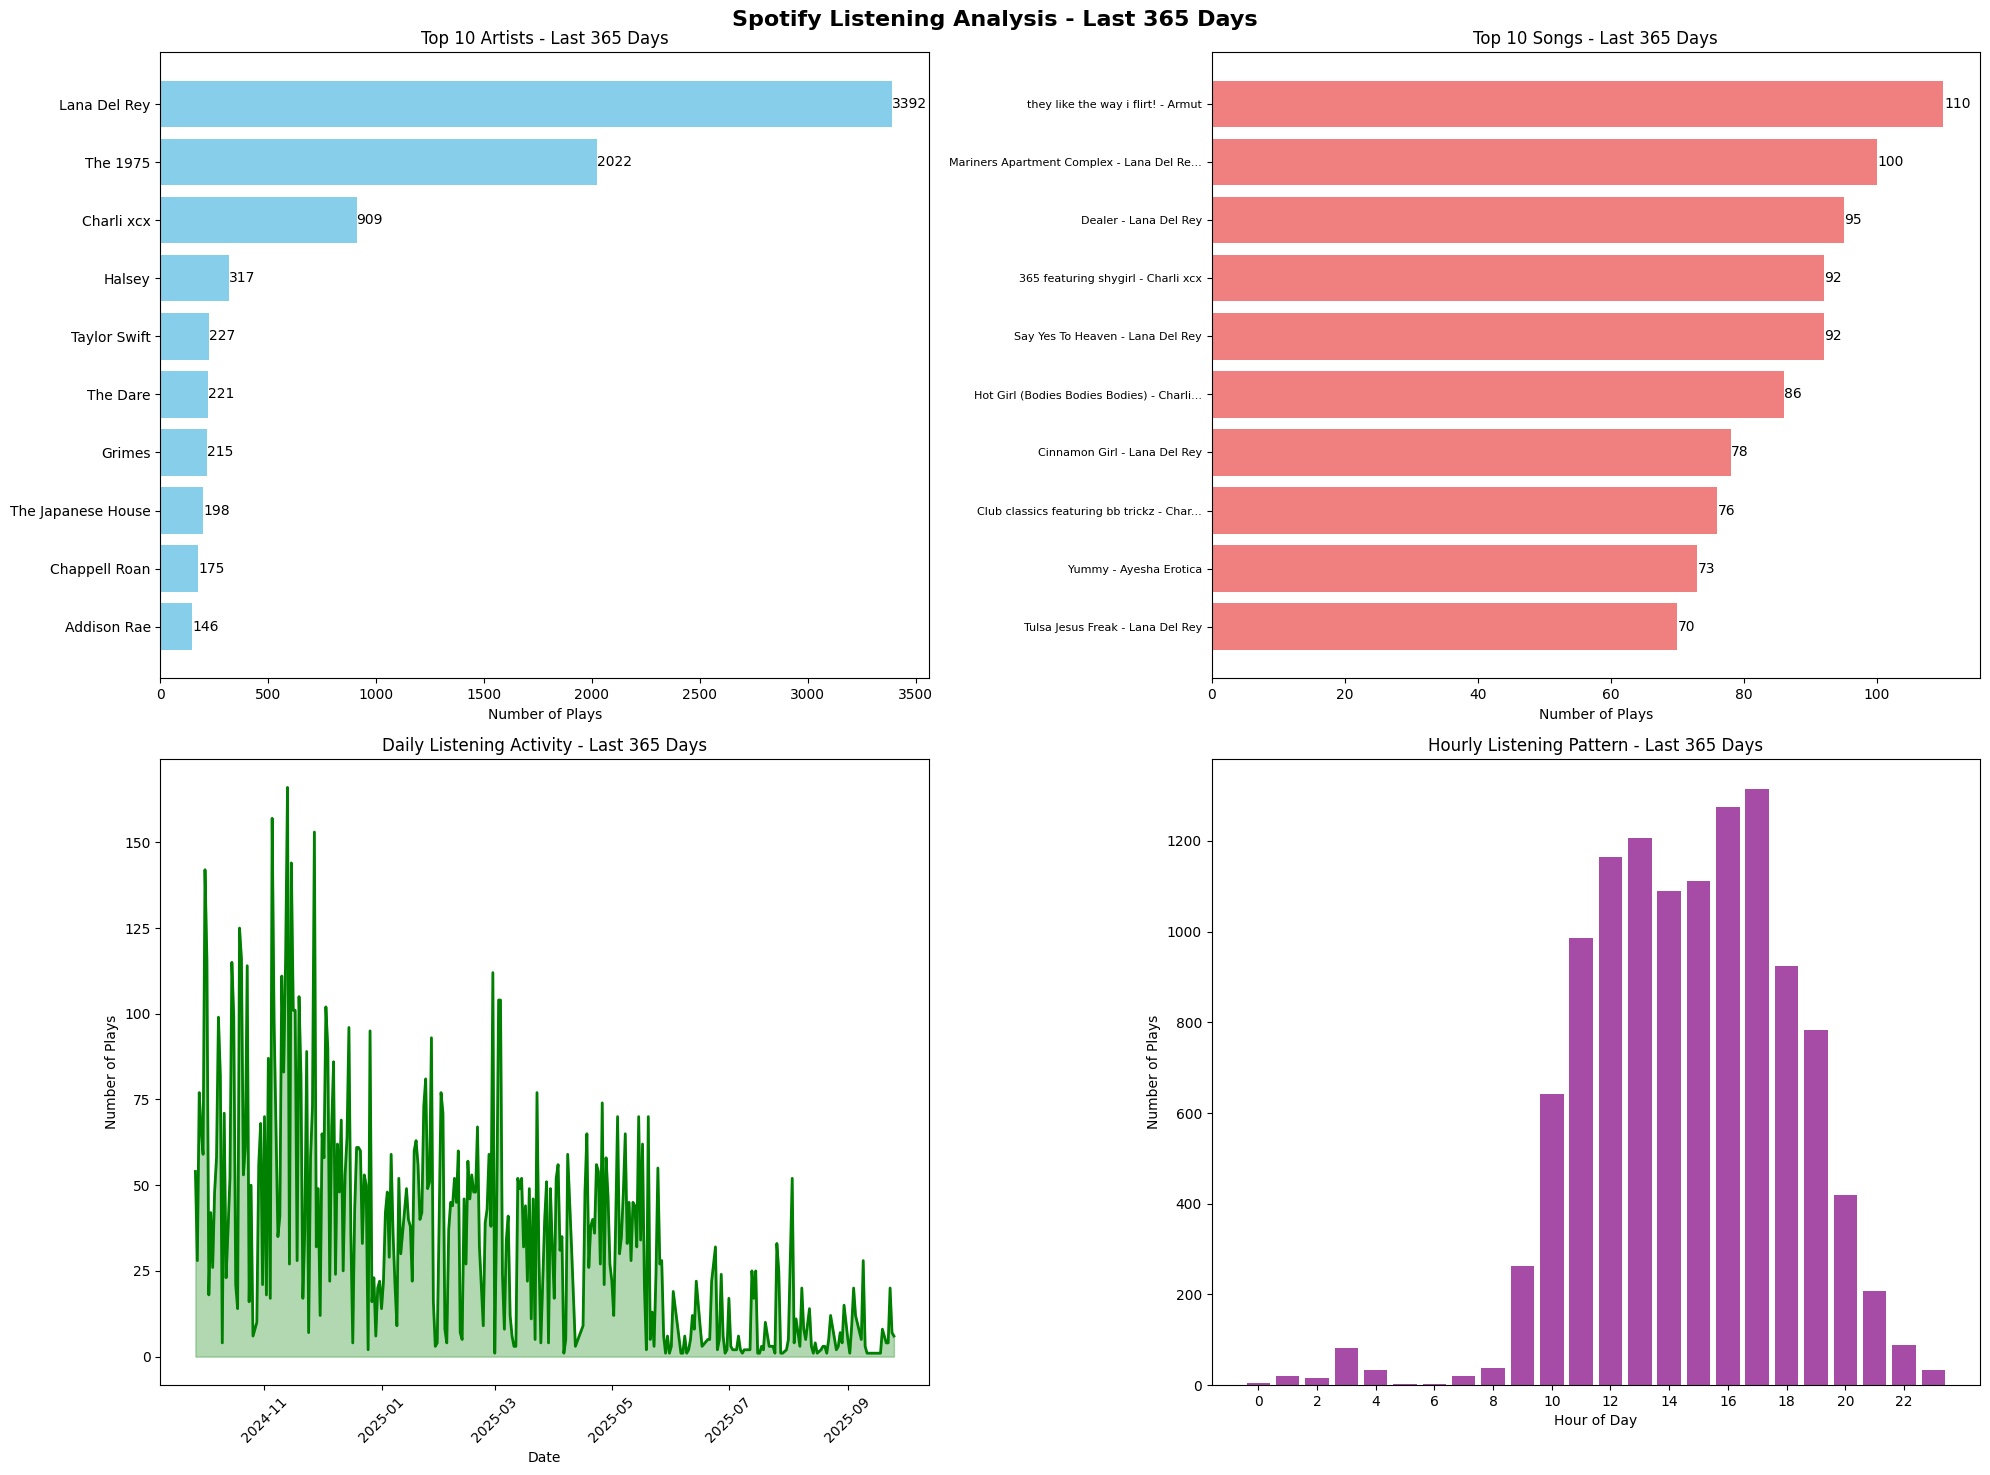


📊 Summary Statistics for Last 365 Days:
🎵 Total plays: 11720
🎤 Unique artists: 524
🎶 Unique songs: 1550
📅 Days with activity: 333
⏰ Most active hour: 17:00
🔥 Most played artist: Lana Del Rey (3392 plays)


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set_palette("husl")

fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle(f'Spotify Listening Analysis - Last {days_to_analyze} Days', fontsize=16, fontweight='bold')

top_artists_recent = df_recent["Artist"].value_counts().head(10)
axes[0, 0].barh(range(len(top_artists_recent)), top_artists_recent.values, color='skyblue')
axes[0, 0].set_yticks(range(len(top_artists_recent)))
axes[0, 0].set_yticklabels(top_artists_recent.index)
axes[0, 0].set_xlabel('Number of Plays')
axes[0, 0].set_title(f'Top 10 Artists - Last {days_to_analyze} Days')
axes[0, 0].invert_yaxis()

for i, v in enumerate(top_artists_recent.values):
    axes[0, 0].text(v + 0.1, i, str(v), va='center')

top_songs_recent = df_recent.groupby(["Song Name", "Artist"]).size().sort_values(ascending=False).head(10)
song_labels = [f"{song} - {artist}" for (song, artist) in top_songs_recent.index]
axes[0, 1].barh(range(len(top_songs_recent)), top_songs_recent.values, color='lightcoral')
axes[0, 1].set_yticks(range(len(top_songs_recent)))
axes[0, 1].set_yticklabels([label[:40] + '...' if len(label) > 40 else label for label in song_labels], fontsize=8)
axes[0, 1].set_xlabel('Number of Plays')
axes[0, 1].set_title(f'Top 10 Songs - Last {days_to_analyze} Days')
axes[0, 1].invert_yaxis()

for i, v in enumerate(top_songs_recent.values):
    axes[0, 1].text(v + 0.1, i, str(v), va='center')

daily_counts_recent = df_recent.groupby('Date').size()
axes[1, 0].plot(daily_counts_recent.index, daily_counts_recent.values, color='green', linewidth=2)
axes[1, 0].fill_between(daily_counts_recent.index, daily_counts_recent.values, alpha=0.3, color='green')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Number of Plays')
axes[1, 0].set_title(f'Daily Listening Activity - Last {days_to_analyze} Days')
axes[1, 0].tick_params(axis='x', rotation=45)

hourly_counts_recent = df_recent["Hour"].value_counts().sort_index()
axes[1, 1].bar(hourly_counts_recent.index, hourly_counts_recent.values, color='purple', alpha=0.7)
axes[1, 1].set_xlabel('Hour of Day')
axes[1, 1].set_ylabel('Number of Plays')
axes[1, 1].set_title(f'Hourly Listening Pattern - Last {days_to_analyze} Days')
axes[1, 1].set_xticks(range(0, 24, 2))

plt.tight_layout()
plt.show()

print(f"\n📊 Summary Statistics for Last {days_to_analyze} Days:")
print(f"🎵 Total plays: {len(df_recent)}")
print(f"🎤 Unique artists: {df_recent['Artist'].nunique()}")
print(f"🎶 Unique songs: {df_recent['Song Name'].nunique()}")
print(f"📅 Days with activity: {df_recent['Date'].nunique()}")
print(f"⏰ Most active hour: {df_recent['Hour'].mode().iloc[0]}:00")
print(f"🔥 Most played artist: {top_artists_recent.index[0]} ({top_artists_recent.iloc[0]} plays)")

🔍 Detailed Analysis for Recent Period:


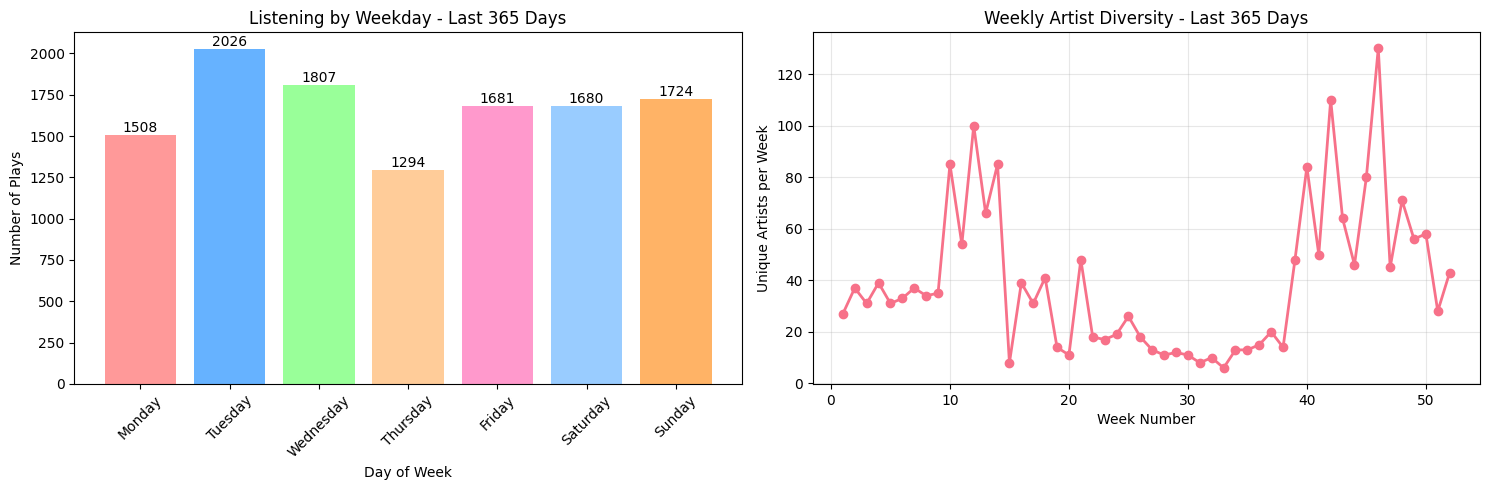


🎯 Listening Habits Insights:
• Favorite day of the week: Tuesday (2026 plays)
• Least active day: Thursday (1294 plays)
• Days with listening activity: 333 out of 365 days
• Average songs per active day: 35.2
• Top artist dominance: 28.9% of all recent plays

💡 Comparison with Overall Data:
• Recent period represents 6.5% of your total listening history
• Recent daily average: 32.1 plays/day
• Overall daily average: 45.6 plays/day


In [27]:

print("🔍 Detailed Analysis for Recent Period:")
print("="*50)

weekday_recent = df_recent["Weekday"].value_counts().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#99CCFF', '#FFB366']
plt.bar(weekday_recent.index, weekday_recent.values, color=colors)
plt.title(f'Listening by Weekday - Last {days_to_analyze} Days')
plt.xlabel('Day of Week')
plt.ylabel('Number of Plays')
plt.xticks(rotation=45)

for i, v in enumerate(weekday_recent.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

plt.subplot(1, 2, 2)
weekly_artist_diversity = df_recent.groupby(df_recent['Date'].apply(lambda x: x.isocalendar()[1]))['Artist'].nunique()
plt.plot(weekly_artist_diversity.index, weekly_artist_diversity.values, marker='o', linewidth=2, markersize=6)
plt.title(f'Weekly Artist Diversity - Last {days_to_analyze} Days')
plt.xlabel('Week Number')
plt.ylabel('Unique Artists per Week')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n🎯 Listening Habits Insights:")
print(f"• Favorite day of the week: {weekday_recent.idxmax()} ({weekday_recent.max()} plays)")
print(f"• Least active day: {weekday_recent.idxmin()} ({weekday_recent.min()} plays)")

date_series = df_recent['Date'].value_counts().sort_index()
print(f"• Days with listening activity: {len(date_series)} out of {days_to_analyze} days")
print(f"• Average songs per active day: {len(df_recent) / len(date_series):.1f}")

top_artist_percentage = (top_artists_recent.iloc[0] / len(df_recent)) * 100
print(f"• Top artist dominance: {top_artist_percentage:.1f}% of all recent plays")

print(f"\n💡 Comparison with Overall Data:")
print(f"• Recent period represents {len(df_recent)/len(df)*100:.1f}% of your total listening history")
print(f"• Recent daily average: {len(df_recent)/days_to_analyze:.1f} plays/day")
print(f"• Overall daily average: {len(df)/(df['Date'].max() - df['Date'].min()).days:.1f} plays/day")